In [ ]:
#Minimal working example of Barlow Twins

#Important: Has both BT implementation and my tinkering with it

In [4]:
import torch
import torch.nn.functional as F
import torch.nn as nn
import seaborn as sns
import numpy as np
from Base_Stein.SVGD_classes import *

In [11]:
#Basic embedding network
class Net(nn.Module):
    
    def __init__(self,xdim,zdim):
        super().__init__()
        self.fc1 = nn.Linear(xdim,xdim)
        self.fc2 = nn.Linear(xdim,zdim)
        self.tanh = nn.Tanh()
        
    def forward(self,x):
        
        x=self.tanh(self.fc1(x))
        x=self.fc2(x)
        
        return x
        

In [3]:

def off_diagonal(X):
    return X*OFF_DIAGONAL
    
    

In [19]:
#Implementation of BT

N=200 #batch size
xdim=25 #Input dimension
zdim=2 #representation size

net = Net(zdim=zdim,xdim=xdim)
optimizer = torch.optim.Adam(net.parameters(),lr=0.001)
#Say x sampled from uniform noise.

x = torch.rand(N,xdim)

lambd=(zdim)/(zdim**2 - zdim)
#lambd=1

EYE = torch.eye(zdim)

PSI = lambd*(torch.ones(zdim,zdim)-EYE) + EYE
#Get x1 and x2 by perturbation of x.
x1 = x + 0.1*torch.rand(N,xdim)
x2 = x + 0.1*torch.rand(N,xdim)

EPOCHS=500
for epoch in range(EPOCHS):
    
    #Get x1 and x2 by perturbation of x.
    x1 = x + 0.1*torch.rand(N,xdim)
    x2 = x + 0.1*torch.rand(N,xdim)

    z1 = net(x1)
    z2 = net(x2)

    # normalize repr. along the batch dimension
    z1_norm = (z1 - z1.mean(0)) / z1.std(0) # NxD
    z2_norm = (z2 - z2.mean(0)) / z2.std(0) # NxD
    
    # cross-correlation matrix
    c = torch.mm(z1_norm.T, z2_norm) / N # DxD

    # loss
    c_diff = (c - EYE).pow(2) # DxD
    
    # multiply off-diagonal elems of c_diff by lambda, on diagonal by 1
    c_diff=PSI*c_diff
    
    loss = c_diff.sum()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    print(loss)

print(c)
print(z1_norm)
print(z2_norm)
print('{} Should be close to 1'.format(torch.min(torch.diag(c)))) #Should be close to 1
print('{} should be close to 0'.format(torch.max(torch.abs((torch.ones(zdim)-torch.eye(zdim))*c)))) #Should be close to zero






tensor(0.0934, grad_fn=<SumBackward0>)
tensor(0.0399, grad_fn=<SumBackward0>)
tensor(0.0125, grad_fn=<SumBackward0>)
tensor(0.0006, grad_fn=<SumBackward0>)
tensor(0.0033, grad_fn=<SumBackward0>)
tensor(0.0150, grad_fn=<SumBackward0>)
tensor(0.0253, grad_fn=<SumBackward0>)
tensor(0.0278, grad_fn=<SumBackward0>)
tensor(0.0194, grad_fn=<SumBackward0>)
tensor(0.0142, grad_fn=<SumBackward0>)
tensor(0.0081, grad_fn=<SumBackward0>)
tensor(0.0041, grad_fn=<SumBackward0>)
tensor(0.0006, grad_fn=<SumBackward0>)
tensor(0.0005, grad_fn=<SumBackward0>)
tensor(0.0044, grad_fn=<SumBackward0>)
tensor(0.0047, grad_fn=<SumBackward0>)
tensor(0.0073, grad_fn=<SumBackward0>)
tensor(0.0093, grad_fn=<SumBackward0>)
tensor(0.0099, grad_fn=<SumBackward0>)
tensor(0.0094, grad_fn=<SumBackward0>)
tensor(0.0054, grad_fn=<SumBackward0>)
tensor(0.0017, grad_fn=<SumBackward0>)
tensor(0.0008, grad_fn=<SumBackward0>)
tensor(0.0004, grad_fn=<SumBackward0>)
tensor(0.0012, grad_fn=<SumBackward0>)
tensor(0.0034, grad_fn=<S

tensor(0.0007, grad_fn=<SumBackward0>)
tensor(0.0008, grad_fn=<SumBackward0>)
tensor(0.0008, grad_fn=<SumBackward0>)
tensor(0.0004, grad_fn=<SumBackward0>)
tensor(0.0005, grad_fn=<SumBackward0>)
tensor(0.0006, grad_fn=<SumBackward0>)
tensor(0.0004, grad_fn=<SumBackward0>)
tensor(0.0004, grad_fn=<SumBackward0>)
tensor(0.0009, grad_fn=<SumBackward0>)
tensor(0.0007, grad_fn=<SumBackward0>)
tensor(0.0006, grad_fn=<SumBackward0>)
tensor(0.0006, grad_fn=<SumBackward0>)
tensor(0.0010, grad_fn=<SumBackward0>)
tensor(0.0010, grad_fn=<SumBackward0>)
tensor(0.0016, grad_fn=<SumBackward0>)
tensor(0.0008, grad_fn=<SumBackward0>)
tensor(0.0006, grad_fn=<SumBackward0>)
tensor(0.0006, grad_fn=<SumBackward0>)
tensor(0.0005, grad_fn=<SumBackward0>)
tensor(0.0010, grad_fn=<SumBackward0>)
tensor(0.0006, grad_fn=<SumBackward0>)
tensor(0.0007, grad_fn=<SumBackward0>)
tensor(0.0005, grad_fn=<SumBackward0>)
tensor(0.0005, grad_fn=<SumBackward0>)
tensor(0.0016, grad_fn=<SumBackward0>)
tensor(0.0014, grad_fn=<S

In [20]:
#Let's plot z1_norm_i * z2_norm_j. Does it look multivariate normal?
#Get representation from above to display

z=(z1_norm*z2_norm)

za = torch.unsqueeze(z1_norm[:,0],1) #First dimension of z1

zb = torch.unsqueeze(z2_norm[:,1],1) #Second dimension of z2

Particles=torch.cat((za,zb),dim=1)
data=Particles.detach().numpy()



In [13]:
#NEW tinkering. My adjustments to BT

N=200 #batch size
zdim=2 #representation size (also input size)
xdim=25
net = Net(zdim=zdim,xdim=xdim)
#optimizer = torch.optim.Adam(net.parameters(),lr=0.01)
optimizer = torch.optim.SGD(net.parameters(),lr=0.01)

#Say x sampled from uniform noise.

x = torch.rand(N,xdim)

lambd1=(zdim)/(zdim**2 - zdim)

lambd=0
#lambd=(zdim)/(zdim**2 - zdim)
#lambd=10

EYE = torch.eye(zdim)
PSI = lambd*(torch.ones(zdim,zdim)-EYE) + EYE

#Get x1 and x2 by perturbation of x.
x1 = x + 0.1*torch.rand(N,xdim)
x2 = x + 0.1*torch.rand(N,xdim)

criterion = nn.MSELoss()

EPOCHS=500
for epoch in range(EPOCHS):
    
    #Get x1 and x2 by perturbation of x.
    x1 = x + 0.1*torch.rand(N,xdim)
    x2 = x + 0.1*torch.rand(N,xdim)

    z1 = net(x1)
    z2 = net(x2)


    # normalize repr. along the batch dimension
    z1_norm = (z1 - z1.mean(0)) / z1.std(0)# NxD
    z2_norm = (z2 - z2.mean(0)) / z2.std(0) # NxD
    
    z1_norm_s = torch.unsqueeze(z1_norm,dim=-1)
    z2_norm_s = torch.unsqueeze(z2_norm,dim=-1)
    
    Particles_1 = torch.cat((z1_norm_s[:,0],z2_norm_s[:,1]),dim=1) #so like (feature_1,feature_2)
    Particles_2 = torch.cat((z1_norm_s[:,1],z2_norm_s[:,0]),dim=1) #so like (feature_2,feature_1)
    
    svgd_1 = trainable_SVGD(N=N,zdim=zdim,eta=0.1)
    svgd_1.Particles = Particles_1.detach()
    
    svgd_2 = trainable_SVGD(N=N,zdim=zdim,eta=0.1)
    svgd_2.Particles = Particles_2.detach()
    
    #Inner loop
    for l in range(2):
    
        g = svgd_1.get_gradient() # "Like forward"
        svgd_1.AdamStep(gradient=g) #"Like step"
        
        g = svgd_2.get_gradient() # "Like forward"
        svgd_2.AdamStep(gradient=g) #"Like step"
    
    loss_1 = criterion(Particles_1,svgd_1.Particles)
    loss_2 = criterion(Particles_2,svgd_2.Particles)
    
    loss_3 = loss_1+loss_2
    
    # cross-correlation matrix
    c = torch.mm(z1_norm.T, z2_norm) / N # DxD
    
    # loss
    c_diff = (c - EYE).pow(2) # DxD
    
    # multiply off-diagonal elems of c_diff by lambda, on diagonal by 1
    c_diff=PSI*c_diff
    
    loss = c_diff.sum() + lambd1*loss_3
    

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

print(c)
print(z1_norm)
print(z2_norm)
print('{} Should be close to 1'.format(torch.min(torch.diag(c)))) #Should be close to 1
print('{} should be close to 0'.format(torch.max(torch.abs((torch.ones(zdim)-torch.eye(zdim))*c)))) #Should be close to zero




tensor([[ 0.9846,  0.0047],
        [-0.0274,  0.9842]], grad_fn=<DivBackward0>)
tensor([[ 0.5360, -1.3001],
        [-1.2700, -1.3961],
        [ 0.3210,  0.6542],
        [ 1.6386,  2.0183],
        [ 0.2611, -1.1919],
        [-0.9569,  1.1961],
        [ 0.4068,  0.2570],
        [ 0.1675,  2.5641],
        [-0.5752,  0.6266],
        [ 1.7478, -0.5286],
        [ 0.0397,  0.9731],
        [-0.6637, -1.2241],
        [ 2.4673, -0.7965],
        [-0.4489,  1.8036],
        [ 0.5348, -0.4303],
        [ 1.5895, -1.7618],
        [-0.0129, -1.3728],
        [-1.0280,  0.8610],
        [ 1.2207, -0.2334],
        [ 0.5984,  0.2921],
        [-0.6942,  0.2574],
        [ 1.1277,  0.3250],
        [-1.0850, -0.8884],
        [ 0.9008,  0.2536],
        [-0.7747, -1.4401],
        [-0.9842,  0.4034],
        [-1.1047, -0.3432],
        [ 0.1424, -0.7312],
        [-0.2275,  1.3664],
        [-2.4695, -0.0586],
        [-0.2003,  1.2387],
        [-1.5397,  1.2330],
        [ 0.5228,  0.52

In [63]:
for l in range(1000):

    g = svgd_1.get_gradient() # "Like forward"
    svgd_1.AdamStep(gradient=g) #"Like step"

    g = svgd_2.get_gradient() # "Like forward"
    svgd_2.AdamStep(gradient=g) #"Like step"

In [35]:

# za = torch.unsqueeze(z1_norm[:,0],1)
# zb = torch.unsqueeze(z2_norm[:,1],1)

#za = torch.unsqueeze(svgd_1.Particles[:,0],1)
#zb = torch.unsqueeze(svgd_2.Particles[:,0],1)

Particles = svgd_1.Particles

Particles=torch.cat((za,zb),dim=1)
data=Particles.detach().numpy()


In [14]:
data = svgd_1.Particles.detach().numpy()

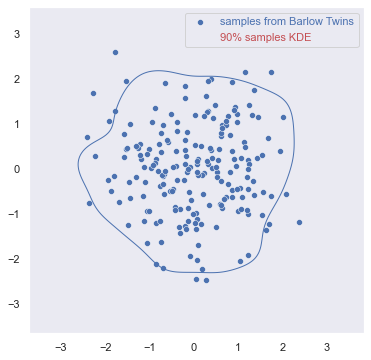

In [21]:
#Reasonably important TODO: Want to plot true 90% ellipse instead of just estimating it from data

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="dark")

# Simulate data from a bivariate Gaussian
n = 3000
mean = [0, 0]
cov = [(1., 0.), (.0, 1.)]
rng = np.random.RandomState(0)
x, y = rng.multivariate_normal(mean, cov, n).T

# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(6, 6))
#sns.scatterplot(x=x, y=y, s=5, color=".15")
#sns.histplot(x=x, y=y, bins=50, pthresh=.1, cmap="mako")

sns.scatterplot(data=data, x=data[:,1], y=data[:,0],color='b',label='samples from Barlow Twins')
#sns.scatterplot(x=x, y=y,color='r',label='samples from true normal')

#sns.kdeplot(x=x, y=y, levels=[0.1], color="r", linewidths=1,label='90% normal kde')

sns.kdeplot(x=data[:,0], y=data[:,1], levels=[0.1], color="b", linewidths=1,label='90% samples KDE')

plt.legend(labelcolor=['b','r','b'],loc=1)




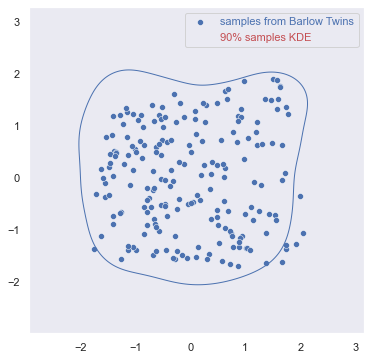
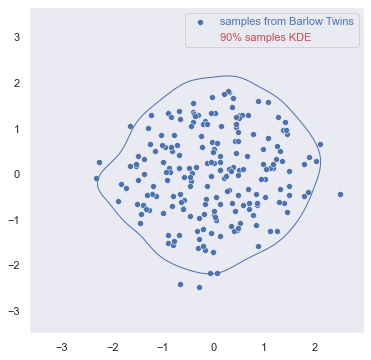